# Practical 5: Logistic Regression

In this demo we will use `scikit-learn`, a popular library for Machine learning in Python.
Check the [documentation here](https://scikit-learn.org/stable/index.html).

## Setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cm = plt.cm.RdBu
cm_bright = plt.cm.jet

Read `.csv` as pandas DataFrame:

In [3]:
df = pd.read_csv('data.csv')

## Exploratory Data Analysis

In [4]:
df[:15]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [5]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Check for class imbalances - this is important since the metric we use to evaluate the model's performance will be accuracy, which is sensitive to class imbalances.

In [7]:
zero_count = np.sum(df['Clicked on Ad'] == 0)
one_count = np.sum(df['Clicked on Ad'] == 1)

print(f'Number of data points with class 0: {zero_count}')
print(f'Number of data points with class 1: {one_count}')

Number of data points with class 0: 500
Number of data points with class 1: 500


## Feature Selection and Visualization

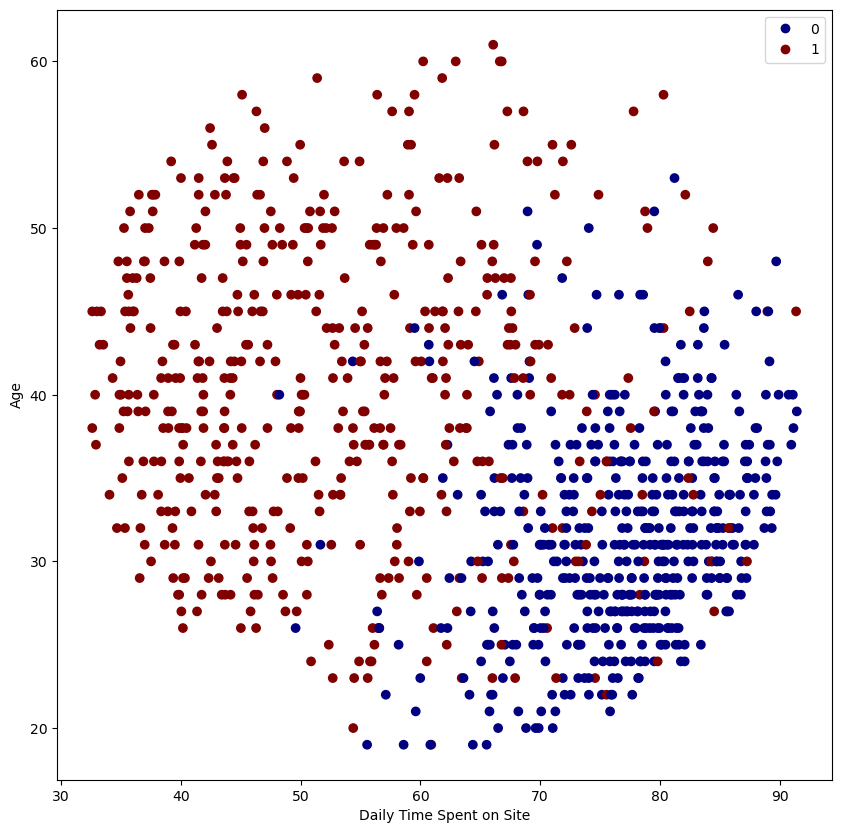

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

# 'Daily Time Spent on Site', 'Daily Internet Usage', 'Area Income', 'Age'
feature1 = 'Daily Time Spent on Site'  
feature2 = 'Age'

p = ax.scatter(df[feature1], df[feature2], c=df['Clicked on Ad'], cmap=cm_bright)

ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.legend(*p.legend_elements(), loc='best')

Let's construct the data matrix $X$ and the label vector $\mathbf{y}$:

In [9]:
X = np.array([df[feature1], df[feature2]]).T
y = np.array(df['Clicked on Ad'])

In [10]:
X[:10, :]

array([[68.95, 35.  ],
       [80.23, 31.  ],
       [69.47, 26.  ],
       [74.15, 29.  ],
       [68.37, 35.  ],
       [59.99, 23.  ],
       [88.91, 33.  ],
       [66.  , 48.  ],
       [74.53, 30.  ],
       [69.88, 20.  ]])

In [11]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Feature preprocessing

First, we will split the dataset into a *training set* (80%) and a test set (20%)
We will then *scale* both features such that the empirical mean is $0$ and the emprical standard deviation is $1$ (for both features).

To this end, we will use the `StandardScaler` class from `sklearn`. **Note**: We compute the statistics used for normalization *only* on the training set (`fit` method). We then use the same statistics to transform *both* the training set *and* the test set.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
print('Feature Mean:', np.round(X_train.mean(axis=0), 4))
print('Feature Standard Deviation:', np.round(X_train.std(axis=0), 4))

Feature Mean: [0. 0.]
Feature Standard Deviation: [1. 1.]


### Scikit-Learn's `LogisticRegression` classifier

Check out the [`LogisticRegression` API documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

**Important Parameters**: `fit_intercept`, `max_iter`, `solver`, `penalty`

**Important Attributes**: `classes_`, `coef_`, `intercept_`. 

**Important Methods**: `fit`, `predict`, `predict_proba`, `score`.

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

mean_test_accuracy = clf.score(X_test, y_test)
print('Mean accuracy on test set:', mean_test_accuracy)

Mean accuracy on test set: 0.895


In [15]:
print('First few predictions on the test set:', clf.predict(X_test[:10]))

First few predictions on the test set: [0 0 0 1 0 1 1 1 0 0]


In [16]:
print('Their corresponding probabilities:\n', clf.predict_proba(X_test[:10]))

Their corresponding probabilities:
 [[0.63452716 0.36547284]
 [0.8576966  0.1423034 ]
 [0.94816647 0.05183353]
 [0.01807161 0.98192839]
 [0.98541868 0.01458132]
 [0.00348082 0.99651918]
 [0.00681285 0.99318715]
 [0.03807561 0.96192439]
 [0.96845383 0.03154617]
 [0.91373093 0.08626907]]


## Visualization of the Decision Boundary

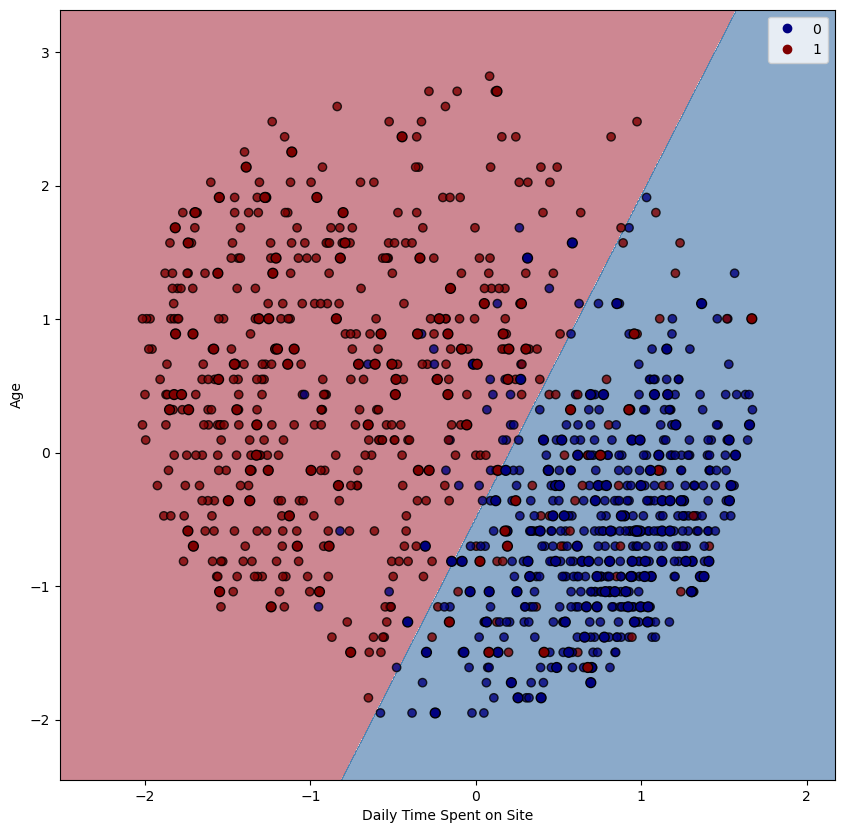

In [17]:
h = .0025  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].

X_scaled = scaler.transform(X)
f1_min, f1_max = X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5
f2_min, f2_max = X_scaled[:, 1].min() - .5, X_scaled[:, 1].max() + .5

ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, h), np.arange(f2_min, f2_max, h))
Z = clf.predict(np.array([ff1.ravel(), ff2.ravel()]).T)
# instead of np.c_[ff1.ravel(), ff2.ravel()], we can write np.array([ff1.ravel(), ff2.ravel()]).T

# Put the result into a color plot
Z = Z.reshape(ff1.shape)

plt.figure(1, figsize=(10, 10))
plt.contourf(ff1, ff2, 1 - Z, cmap=cm, alpha=.5) # contourf plots filled contours.

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cm_bright, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=cm_bright, s=50)

plt.xlabel(feature1)
plt.ylabel(feature2)

plt.xlim(ff1.min(), ff1.max())
plt.ylim(ff2.min(), ff2.max())

plt.legend(*p.legend_elements(), loc='best')